In [157]:
from google.colab import files
uploaded=files.upload()

Saving fcc-forum-pageviews.txt to fcc-forum-pageviews (1).txt


In [199]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
df=pd.read_csv(io.BytesIO(uploaded['fcc-forum-pageviews.txt']),parse_dates=['date'],index_col=['date'])

df = df[(df['value']>= df['value'].quantile(0.025)) & (df['value']<= df['value'].quantile(0.975))]
df

# top=df.sort_values(by='value',ascending=False).head(math.ceil((len(df)*(2.5/100))))
# bottom=df.sort_values(by='value',ascending=True).head(math.ceil((len(df)*(2.5/100))))
# top

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


No handles with labels found to put in legend.


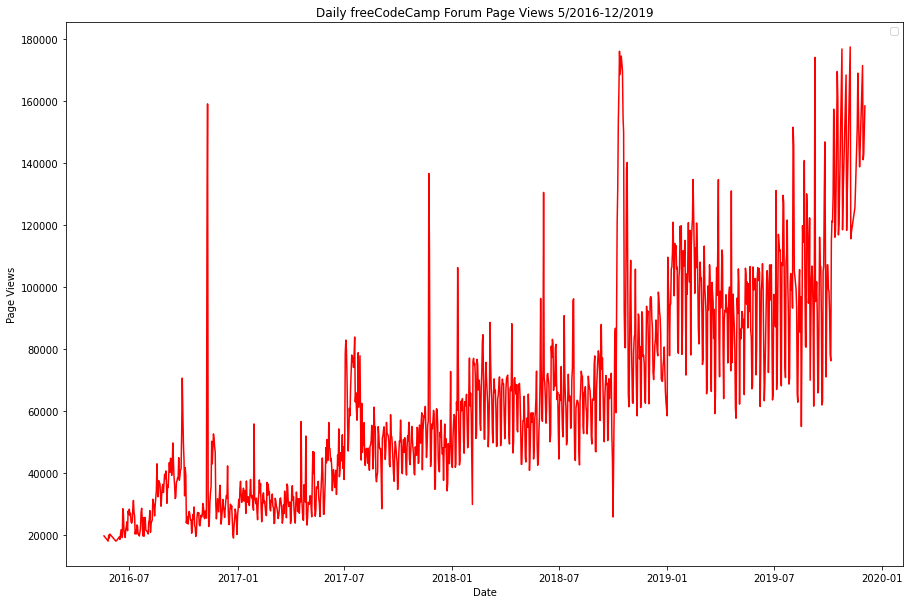

In [200]:
fig,ax=plt.subplots(figsize=(15,10))
ax.plot(df.index,df['value'],'r')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
plt.legend()
plt.show()

In [201]:
df['month']=df.index.strftime('%B')
df['year']=df.index.strftime('%Y')
df_bar=df.groupby(['year','month'])['value'].mean()
df_bar=df_bar.unstack()
df_bar

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2016,NaN,31049.193548,27832.419355,NaN,NaN,24109.678571,21875.105263,NaN,19432.400000,40448.633333,27398.322581,41476.866667
2017,30878.733333,47712.451613,48420.580645,31113.071429,32785.161290,65806.838710,43577.500000,29369.096774,34244.290323,57701.566667,47438.709677,47376.800000
2018,62350.833333,62831.612903,80047.483871,65679.000000,58580.096774,63591.064516,70117.000000,62693.774194,56562.870968,78688.333333,111378.142857,65941.733333
2019,89368.433333,102717.310345,150733.500000,105968.357143,102056.516129,97236.566667,90435.642857,91214.483871,91439.903226,143166.428571,122802.272727,97268.833333


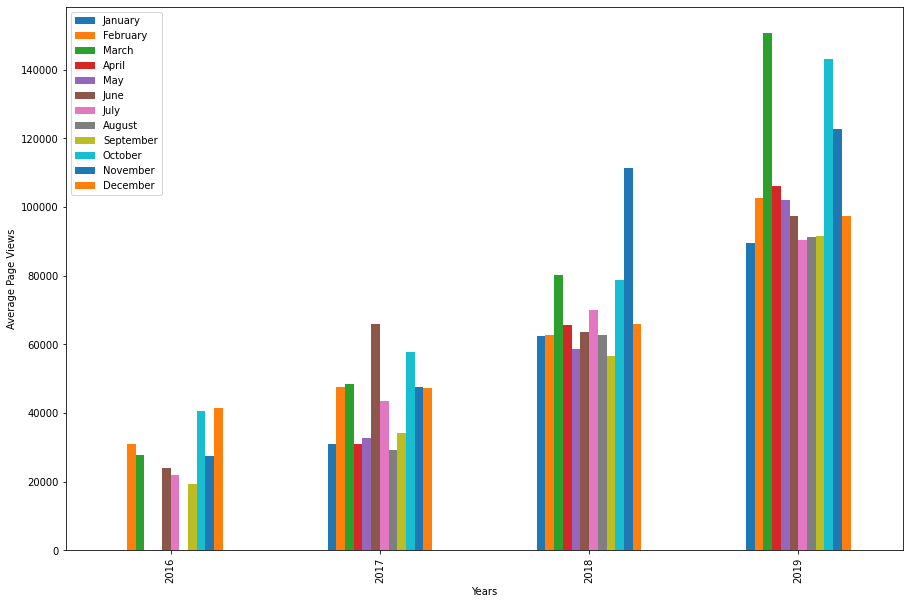

In [216]:
fig=df_bar.plot.bar(legend=True,xlabel="Years",ylabel="Average Page Views",figsize=(15,10))


plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

In [203]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,month,year
0,2016-05-19,19736,May,2016
1,2016-05-26,18060,May,2016
2,2016-05-27,19997,May,2016
3,2016-05-28,19044,May,2016
4,2016-05-29,20325,May,2016
...,...,...,...,...
1233,2019-11-24,138875,Nov,2019
1234,2019-11-29,171584,Nov,2019
1235,2019-11-30,141161,Nov,2019
1236,2019-12-01,142918,Dec,2019


Text(0, 0.5, 'Page Views')

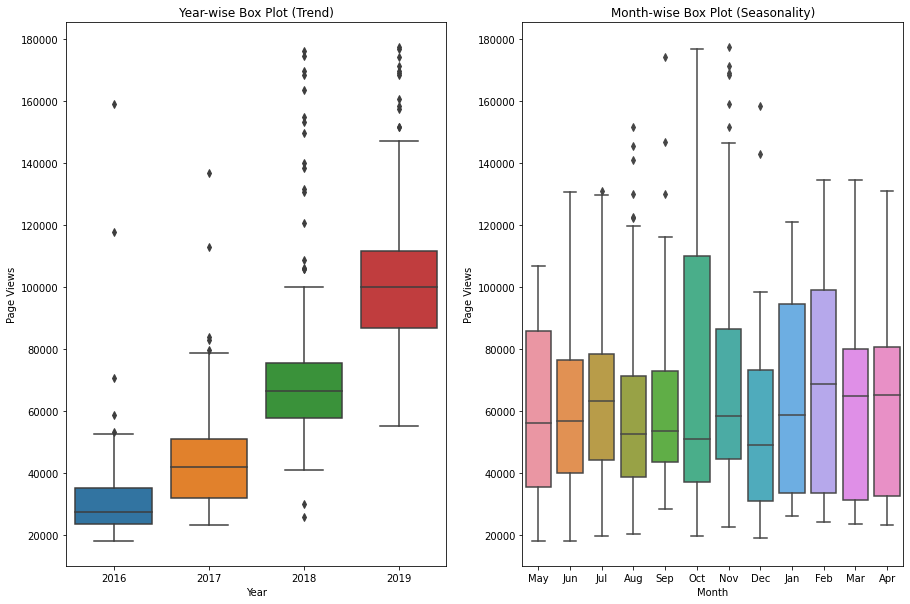

In [224]:
fig,af=plt.subplots(1,2,figsize=(15,10))

af[0]=sns.boxplot(x=df_box['year'],y=df_box['value'],ax=af[0])
af[0].set_title("Year-wise Box Plot (Trend)")
af[0].set_xlabel("Year")
af[0].set_ylabel("Page Views")
af[1]=sns.boxplot(x=df_box['month'],y=df_box['value'],ax=af[1])
af[1].set_title("Month-wise Box Plot (Seasonality)")
af[1].set_xlabel("Month")
af[1].set_ylabel("Page Views")
# af[1].set_xticks(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])